In [8]:
import numpy as np

data = np.loadtxt(fname="./linear_data.csv", delimiter='\t')

# normalization
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, : -1]
y = data[:, -1]

In [9]:
N, M = x.shape
N, M

(1503, 5)

In [10]:
def predict(x):
    return w.dot(x) + b

In [11]:
# Test
w = np.ones(M)
b = 0
predict(x[0])

0.6590042695516543

In [12]:
def get_loss():
    loss = 0
    for i in range(N):
        pred = predict(x[i])
        loss += (pred - y[i]) ** 2
        
    return loss / N

In [13]:
get_loss()

7.367867692433937

In [39]:
def get_gradient():
    global w
    global b
    
    eps = 1e-3
    
    loss_before = get_loss()
    
    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss()
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps
        
        b += eps
        loss_after = get_loss()
        b -= eps
        gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient()

(array([2.03668543, 2.38225639, 1.02215384, 2.13526642, 3.22327899]),
 0.00100000000458067)

In [50]:
plt_x = []
plt_y = []
for i in range(500):
    gradient_w, gradient_b = get_gradient()
    w -= gradient_w * 1e-2
    b -= gradient_b * 1e-2

    plt_x.append(i)
    plt_y.append(get_loss())

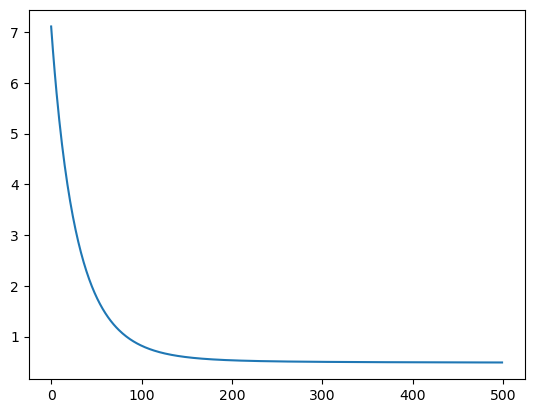

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()